In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from pandas_datareader import data as pdr 
import yfinance as yf 
yf.pdr_override()

df = pdr.get_data_yahoo("AAPL", start="2013-05-01", end="2023-05-01") 
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-05-01,15.873571,15.890357,15.513929,15.688929,13.531512,506909200
2013-05-02,15.777857,16.021070,15.736786,15.911429,13.723418,421828400
2013-05-03,16.118214,16.186787,16.041071,16.070715,13.860800,361300800
2013-05-06,16.275356,16.507143,16.225357,16.453930,14.191321,496641600
2013-05-07,16.606071,16.633928,16.203571,16.380714,14.128173,483753200


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,165.000000,165.600006,163.889999,165.330002,165.101639,41949600
2023-04-25,165.190002,166.309998,163.729996,163.770004,163.543793,48714100
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.533798,45498800
2023-04-27,165.190002,168.559998,165.190002,168.410004,168.177383,64902300
2023-04-28,168.490005,169.850006,167.880005,169.679993,169.445618,55209200


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-05-01,15.873571,15.890357,15.513929,15.688929,13.531512,506909200
1,2013-05-02,15.777857,16.021070,15.736786,15.911429,13.723418,421828400
2,2013-05-03,16.118214,16.186787,16.041071,16.070715,13.860800,361300800
3,2013-05-06,16.275356,16.507143,16.225357,16.453930,14.191321,496641600
4,2013-05-07,16.606071,16.633928,16.203571,16.380714,14.128173,483753200


In [6]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,15.873571,15.890357,15.513929,15.688929,506909200
1,15.777857,16.021070,15.736786,15.911429,421828400
2,16.118214,16.186787,16.041071,16.070715,361300800
3,16.275356,16.507143,16.225357,16.453930,496641600
4,16.606071,16.633928,16.203571,16.380714,483753200


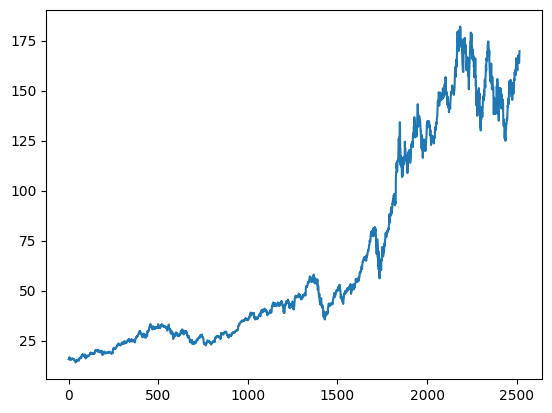

In [7]:
plt.plot(df.Close)

In [8]:
df

,Open,High,Low,Close,Volume
0,15.873571,15.890357,15.513929,15.688929,506909200
1,15.777857,16.021070,15.736786,15.911429,421828400
2,16.118214,16.186787,16.041071,16.070715,361300800
3,16.275356,16.507143,16.225357,16.453930,496641600
4,16.606071,16.633928,16.203571,16.380714,483753200
...,...,...,...,...,...
2512,165.000000,165.600006,163.889999,165.330002,41949600
2513,165.190002,166.309998,163.729996,163.770004,48714100
2514,163.059998,165.279999,162.800003,163.759995,45498800
2515,165.190002,168.559998,165.190002,168.410004,64902300


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2512    148.0303
2513    148.2563
2514    148.4136
2515    148.6146
2516    148.8333
Name: Close, Length: 2517, dtype: float64

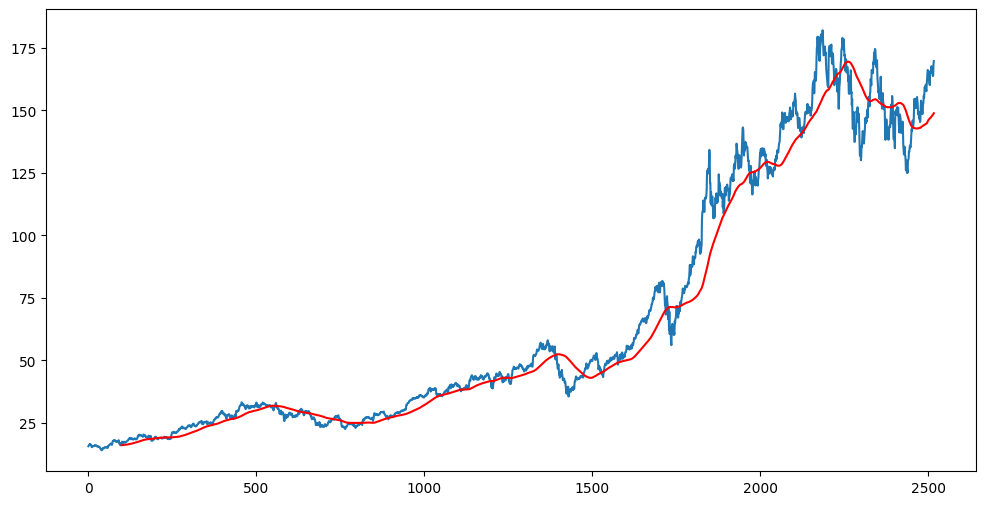

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    150.48445
2513    150.56810
2514    150.66255
2515    150.77530
2516    150.89625
Name: Close, Length: 2517, dtype: float64

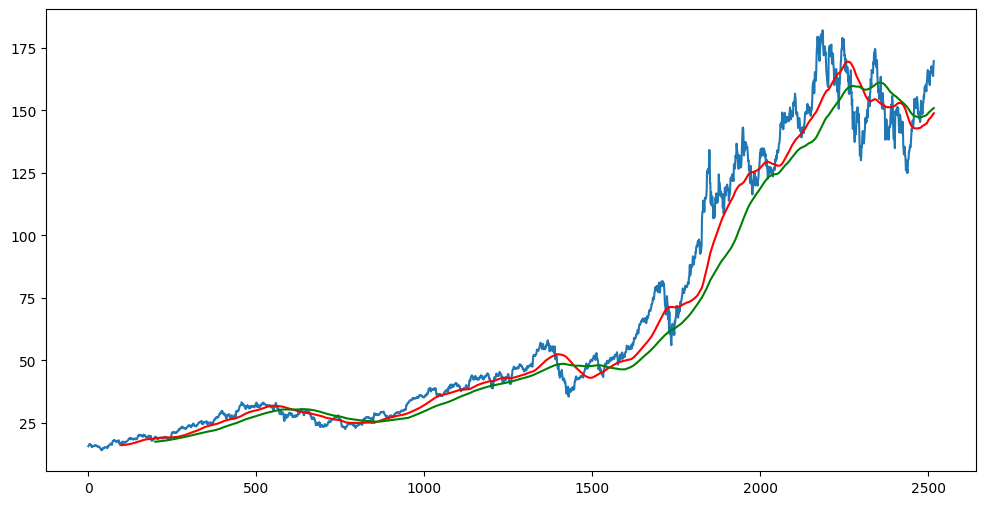

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape


(2517, 5)

In [14]:
#Splitting
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02399532],
       [0.02728013],
       [0.02963168],
       ...,
       [0.83675694],
       [0.83749514],
       [0.82055437]])

In [17]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2023-06-30 10:06:31.560848: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
!pip3 install keras


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip


In [20]:
!pip3 install tensorflow


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip


In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 11s 123ms/step - loss: 0.0358
Epoch 2/50
52/52 [==============================] - 6s 123ms/step - loss: 0.0085
Epoch 3/50
52/52 [==============================] - 6s 123ms/step - loss: 0.0067
Epoch 4/50
52/52 [==============================] - 6s 124ms/step - loss: 0.0059
Epoch 5/50
52/52 [==============================] - 6s 124ms/step - loss: 0.0054
Epoch 6/50
52/52 [==============================] - 6s 122ms/step - loss: 0.0043
Epoch 7/50
52/52 [==============================] - 6s 123ms/step - loss: 0.0042
Epoch 8/50
52/52 [==============================] - 6s 124ms/step - loss: 0.0042
Epoch 9/50
52/52 [==============================] - 6s 124ms/step - loss: 0.0046
Epoch 10/50
52/52 [==============================] - 6s 124ms/step - loss: 0.0042
Epoch 11/50
52/52 [==============================] - 6s 124ms/step - loss: 0.0036
Epoch 12/50
52/52 [==============================] - 6s 124ms/step - loss: 0.0035
Epoch 13/50
52/52 [=====

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
1761,71.932503
1762,73.449997
1763,72.267502
1764,73.290001
1765,74.389999


In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = past_100_days._append(data_testing, ignore_index=True)

In [28]:
 final_df.head()

,Close
0,65.434998
1,66.394997
2,67.677498
3,66.730003
4,67.120003


In [29]:
input_data=scaler.fit_transform(final_df)
input_data


array([[0.0741954 ],
       [0.08181943],
       [0.09200468],
       [0.08447996],
       [0.08757722],
       [0.0921238 ],
       [0.09349375],
       [0.10081998],
       [0.11017133],
       [0.11126335],
       [0.10993309],
       [0.110489  ],
       [0.10933748],
       [0.11839102],
       [0.11892707],
       [0.1301249 ],
       [0.12990648],
       [0.13332141],
       [0.13755038],
       [0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.204

In [30]:
input_data.shape

(856, 1)

In [31]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [32]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(756, 100, 1)
(756,)


In [33]:
#makingpredictions
y_predicted = model.predict(x_test)


24/24 [==============================] - 2s 43ms/step


In [34]:
y_test

array([0.12579669, 0.13784818, 0.12845715, 0.13657754, 0.14531341,
       0.15140868, 0.15758333, 0.17027024, 0.17995914, 0.17281159,
       0.16534636, 0.16909885, 0.16546548, 0.17985983, 0.1762464 ,
       0.18833764, 0.18361231, 0.1876626 , 0.18337407, 0.18611391,
       0.1863919 , 0.18577642, 0.19353945, 0.19649772, 0.20003177,
       0.1944726 , 0.21269881, 0.21659023, 0.23749677, 0.25506781,
       0.22143467, 0.2271924 , 0.23551135, 0.25355887, 0.25258603,
       0.25286402, 0.24887329, 0.26703994, 0.28224831, 0.2694026 ,
       0.27889294, 0.25663632, 0.27281754, 0.2788135 , 0.27744355,
       0.27744355, 0.29678165, 0.29447855, 0.31171204, 0.31496817,
       0.31629838, 0.31278419, 0.32533211, 0.33063316, 0.32108326,
       0.31953463, 0.33565629, 0.32487544, 0.32703954, 0.29187765,
       0.29005103, 0.30748307, 0.2951139 , 0.30930969, 0.31844267,
       0.39841567, 0.41967958, 0.42545718, 0.428614  , 0.45911013,
       0.43695282, 0.44977866, 0.42315407, 0.4520222 , 0.46790

In [35]:
y_predicted

array([[0.13793635],
       [0.13927305],
       [0.14052945],
       [0.14193854],
       [0.14367162],
       [0.14587307],
       [0.14864093],
       [0.15202235],
       [0.15598868],
       [0.16053489],
       [0.16562508],
       [0.17104146],
       [0.17649461],
       [0.18168728],
       [0.18644708],
       [0.19063862],
       [0.19426185],
       [0.19733267],
       [0.19991373],
       [0.20203991],
       [0.20375484],
       [0.20510498],
       [0.2061305 ],
       [0.20692255],
       [0.2075949 ],
       [0.20827225],
       [0.2089959 ],
       [0.2098914 ],
       [0.21108636],
       [0.21280222],
       [0.2153094 ],
       [0.21850562],
       [0.22212073],
       [0.22592433],
       [0.22980458],
       [0.23363954],
       [0.23739097],
       [0.24094497],
       [0.24430731],
       [0.24772471],
       [0.2513433 ],
       [0.25505343],
       [0.25868717],
       [0.26213226],
       [0.2652649 ],
       [0.26803562],
       [0.2704087 ],
       [0.272

In [36]:
scaler.scale_

array([0.00794171])

In [37]:
scale_factor=1/0.00794171
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

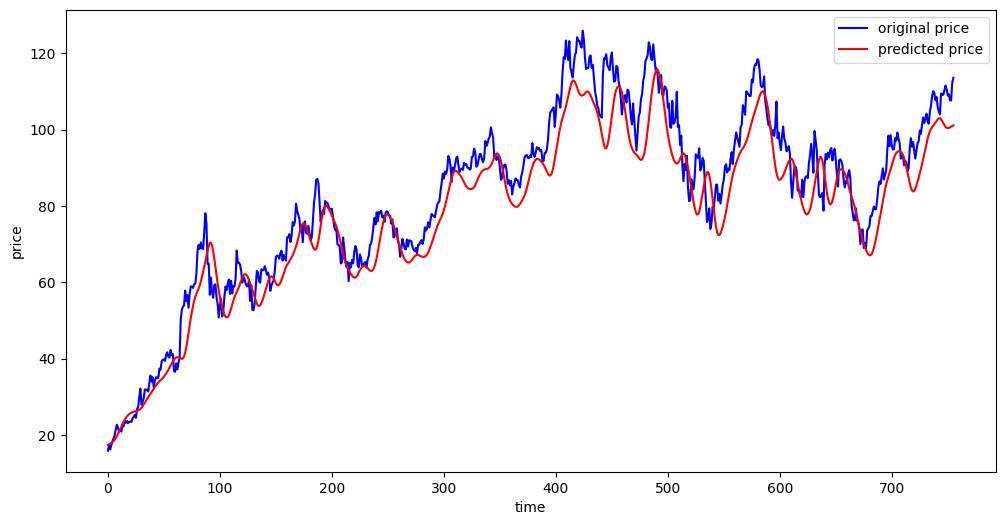

In [38]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predicted))


ValueError: continuous is not supported